# **CORNER DETECTION:**

**What is a corner?**<br>
A corner is a point whose local neighbourhood stands in two dominant and different edge directions.

<center>OR</center>

A corner can be interpreted as *the junction of two edges*, where an edge is a sudden change in image brightness.

There are various corner detection algorithms.
We will take a look at two most popular algorithms:
- Harris Corner Detection
- Shi-Tomasi Corner Detection

The idea is to consider a small window around each pixel p in an image. We want to identify all such pixel windows that are unique. Uniqueness can be measured by shifting each window by a small amount in a given direction and measuring the amount of change that occurs in the pixel values.

### Harris Corner Detector

The Harris Corner Detector algorithm in simple words is as follows:

    STEP 1. It determines which windows (small image patches) produce very large variations in intensity when moved in both X and Y directions (i.e. gradients).

    STEP 2. With each such window found, a score R is computed.

    STEP 3. After applying a threshold to this score, important corners are selected & marked.

A score is calculated for each window.

Score $R = lambda1*lambda2 -  k(lambda1+lambda2)$

### Shi-Tomasi Corner Detector

Shi-Tomasi is almost similar to Harris Corner detector, apart from the way the score (R) is calculated. This gives a better result. Moreover, in this method, we can find the top N corners, which might be useful in case we don’t want to detect each and every corner. 

For Shi-Tomasi, $R = min(lambda1, lambda2)$

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

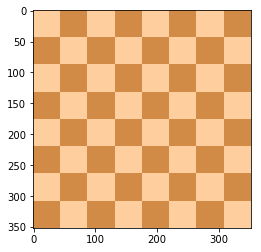

In [4]:
flat_chess = cv2.imread('../DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess)

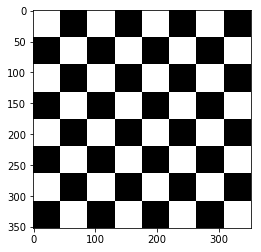

In [5]:
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flat_chess, cmap='gray')

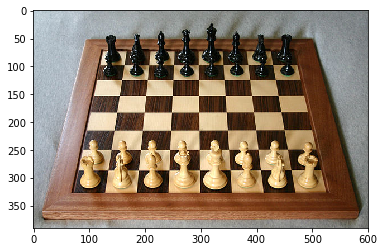

In [6]:
real_chess = cv2.imread('../DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

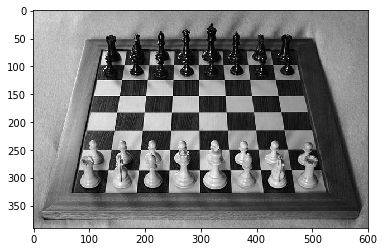

In [7]:
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess, cmap='gray')

In [8]:
gray_flat_chess

array([[197, 197, 197, ..., 127, 127, 127],
       [197, 197, 197, ..., 127, 127, 127],
       [197, 197, 197, ..., 127, 127, 127],
       ...,
       [127, 127, 127, ..., 197, 197, 197],
       [127, 127, 127, ..., 197, 197, 197],
       [127, 127, 127, ..., 197, 197, 197]], dtype=uint8)

In [9]:
gray_real_chess

array([[210, 204, 202, ..., 119, 119, 124],
       [203, 200, 199, ..., 118, 116, 117],
       [213, 214, 212, ..., 130, 128, 128],
       ...,
       [120, 131, 144, ..., 115, 119, 118],
       [124, 143, 153, ..., 111, 112, 107],
       [135, 155, 156, ..., 113, 113, 107]], dtype=uint8)

These images are made of integer values. **For corner detection algorithms to work, we need floating point values.**

In [12]:
#Converting into float:
gray = np.float32(gray_flat_chess)
gray

array([[197., 197., 197., ..., 127., 127., 127.],
       [197., 197., 197., ..., 127., 127., 127.],
       [197., 197., 197., ..., 127., 127., 127.],
       ...,
       [127., 127., 127., ..., 197., 197., 197.],
       [127., 127., 127., ..., 197., 197., 197.],
       [127., 127., 127., ..., 197., 197., 197.]], dtype=float32)

In [13]:
dst = cv2.cornerHarris(src = gray, blockSize = 2, ksize = 3, k = 0.04)

In [14]:
dst = cv2.dilate(dst, None)

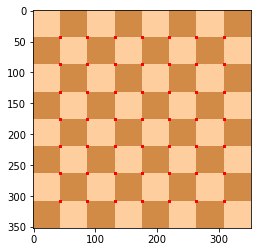

In [16]:
flat_chess[dst>0.01*dst.max()] = [255,0,0] 
plt.imshow(flat_chess)

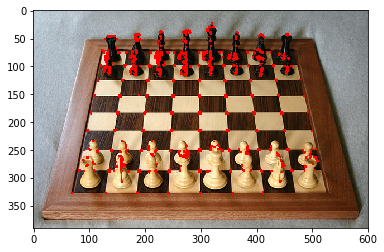

In [21]:
gray = np.float32(gray_real_chess)
dst = cv2.cornerHarris(src = gray, blockSize = 2, ksize = 3, k = 0.04)
dst = cv2.dilate(dst, None)
real_chess[dst>0.01*dst.max()] = [255,0,0] 
plt.imshow(real_chess)